In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from scattermap import scattermap

In [2]:
df_1 = pd.read_csv('./out/pvalues.txt', sep='\t', index_col='interacting_pair')
df_1.head()

,id_cp_interaction,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,...,γδ|CA,γδ|CD4 memory,γδ|CD8+ cytotoxic,γδ|Follicular BC,γδ|MALT BC,γδ|NK,γδ|NK cell,γδ|Naive CD4+,γδ|Treg,γδ|γδ
interacting_pair,,,,,,,,,,,,,,,,,,,,,
KLRG2_WNT11,CPI-SS0A7B487D4,simple:A4D1S0,simple:O96014,ENSG00000188883,ENSG00000085741,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_TNFSF9,CPI-SS0FEC87269,simple:A4D1S0,simple:P41273,ENSG00000188883,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PVR_TNFSF9,CPI-SS00A8596B5,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_WNT5B,CPI-SS044DF8749,simple:A4D1S0,simple:Q9H1J7,ENSG00000188883,ENSG00000111186,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GALR2_GAL,CPI-SS0F8ABC300,simple:O43603,simple:P22466,ENSG00000182687,ENSG00000069482,True,True,False,guidetopharmacology.org,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
df_1.columns.tolist()

['id_cp_interaction',
 'partner_a',
 'partner_b',
 'gene_a',
 'gene_b',
 'secreted',
 'receptor_a',
 'receptor_b',
 'annotation_strategy',
 'is_integrin',
 'CA|CA',
 'CA|CD4 memory',
 'CA|CD8+ cytotoxic',
 'CA|Follicular BC',
 'CA|MALT BC',
 'CA|NK',
 'CA|NK cell',
 'CA|Naive CD4+',
 'CA|Treg',
 'CA|γδ',
 'CD4 memory|CA',
 'CD4 memory|CD4 memory',
 'CD4 memory|CD8+ cytotoxic',
 'CD4 memory|Follicular BC',
 'CD4 memory|MALT BC',
 'CD4 memory|NK',
 'CD4 memory|NK cell',
 'CD4 memory|Naive CD4+',
 'CD4 memory|Treg',
 'CD4 memory|γδ',
 'CD8+ cytotoxic|CA',
 'CD8+ cytotoxic|CD4 memory',
 'CD8+ cytotoxic|CD8+ cytotoxic',
 'CD8+ cytotoxic|Follicular BC',
 'CD8+ cytotoxic|MALT BC',
 'CD8+ cytotoxic|NK',
 'CD8+ cytotoxic|NK cell',
 'CD8+ cytotoxic|Naive CD4+',
 'CD8+ cytotoxic|Treg',
 'CD8+ cytotoxic|γδ',
 'Follicular BC|CA',
 'Follicular BC|CD4 memory',
 'Follicular BC|CD8+ cytotoxic',
 'Follicular BC|Follicular BC',
 'Follicular BC|MALT BC',
 'Follicular BC|NK',
 'Follicular BC|NK cell',
 'Fo

In [7]:
df_2=df_1[[
 'secreted', 'is_integrin',
 'CA|CD4 memory',
 'CA|CD8+ cytotoxic',
 'CA|Follicular BC',
 'CA|MALT BC',
 'CA|NK',
 'CA|NK cell',
 'CA|Naive CD4+',
 'CA|Treg',
 'CA|γδ']]
df_2.shape

(1229, 11)

In [16]:
df_3 = df_2[((df_2['secreted']==True) & (df_2['is_integrin']==False))]
df_3.shape

(836, 11)

In [17]:
df_4 = df_3[(df_3['CA|CD4 memory']<0.001)|
            (df_3['CA|Follicular BC']<0.001)|            
            (df_3['CA|MALT BC']<0.001)|
            (df_3['CA|NK']<0.001)|
            (df_3['CA|NK cell']<0.001)|
            (df_3['CA|Naive CD4+']<0.001)|
            (df_3['CA|Treg']<0.001)|                  
            (df_3['CA|γδ']<0.001)]
df_4.shape

(16, 11)

In [18]:
df_4.columns.tolist()

['secreted',
 'is_integrin',
 'CA|CD4 memory',
 'CA|CD8+ cytotoxic',
 'CA|Follicular BC',
 'CA|MALT BC',
 'CA|NK',
 'CA|NK cell',
 'CA|Naive CD4+',
 'CA|Treg',
 'CA|γδ']

In [20]:
df_5 = df_4[[
 'CA|CD4 memory',
 'CA|CD8+ cytotoxic',
 'CA|NK',
 'CA|NK cell',
 'CA|Naive CD4+',
 'CA|Treg',
 'CA|γδ',
 'CA|Follicular BC',
 'CA|MALT BC']]
df_6 = df_5.sort_index(ascending=True)

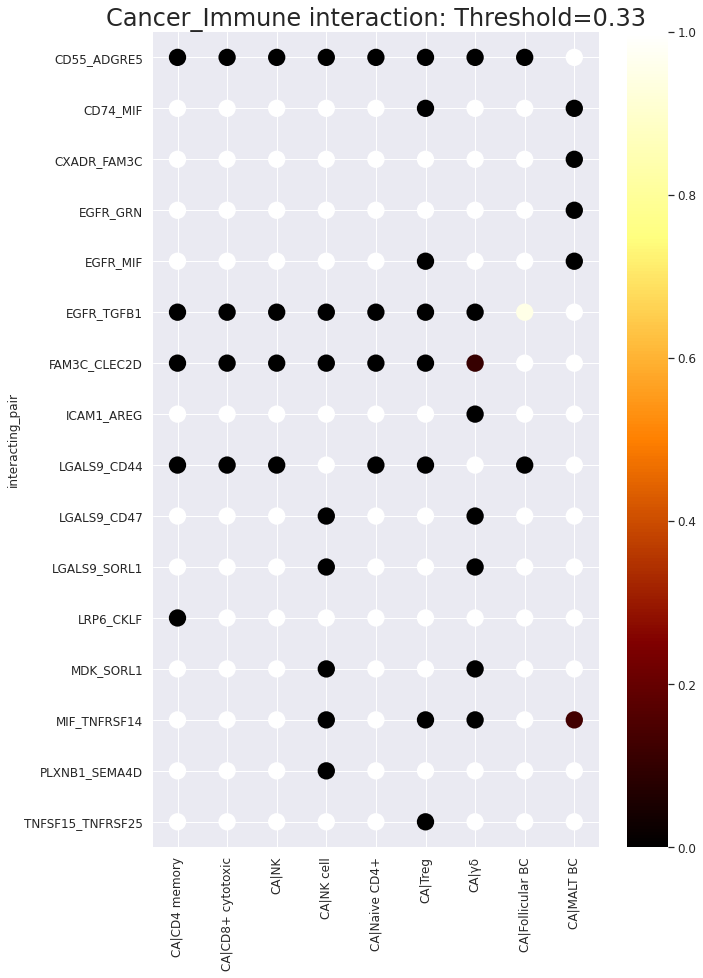

In [24]:
fig, ax = plt.subplots(figsize=(10, 15))

plt.title("Cancer_Immune interaction: Threshold=0.33", size=24)
plt.rc('xtick', labelsize=12) # fontsize of the tick labels 
plt.rc('ytick', labelsize=12) # fontsize of the tick labels 
plt.rc('legend', fontsize=12)

ax=scattermap(df_6, marker_size=300, vmin=0, vmax=1, cmap='afmhot') #cmap=plt.cm.RdYlGn
plt.savefig("CA_IM.jpeg",dpi=1200)

In [ ]:
scattermap?